# Linear Models
The goal of this notebook is to work with Linear Models for regression problems.

***

# Preface

In [2]:
import os
os.chdir("/home/jovyan/work")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.linear_models import (
    build_design_matrix,
    maximum_likelihood_regression,
)

sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)

***

# Task 1
## General fit

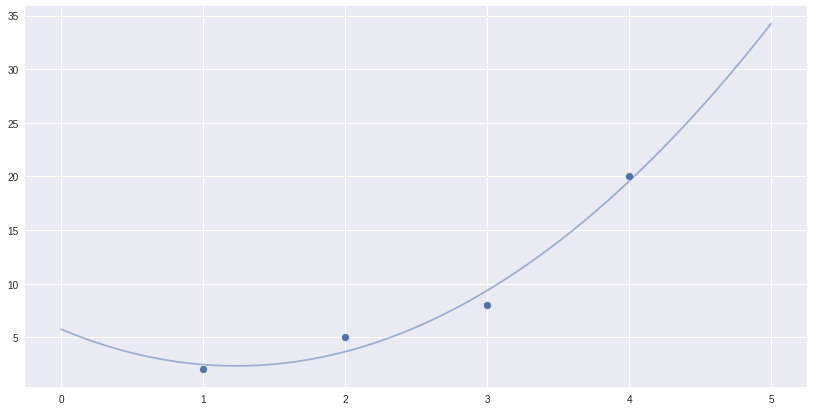

In [3]:
# init variables
X = np.array([1, 2, 3, 4])
Y = np.array([2, 5, 8, 20])
PHI = {
    "phi_0": lambda x: x*0 + 1, 
    "phi_1": lambda x: x,
    "phi_2": lambda x: x**2,
}

# get optimal parameter
W = maximum_likelihood_regression(X, PHI, Y)

# plot points vs optimal parameter
p_2 = np.polynomial.polynomial.Polynomial(W)
plt.scatter(X, Y)
plt.plot(
    np.linspace(0, 5, 100),
    p_2(np.linspace(0, 5, 100)),
    alpha=.5
);

## Copare regularization

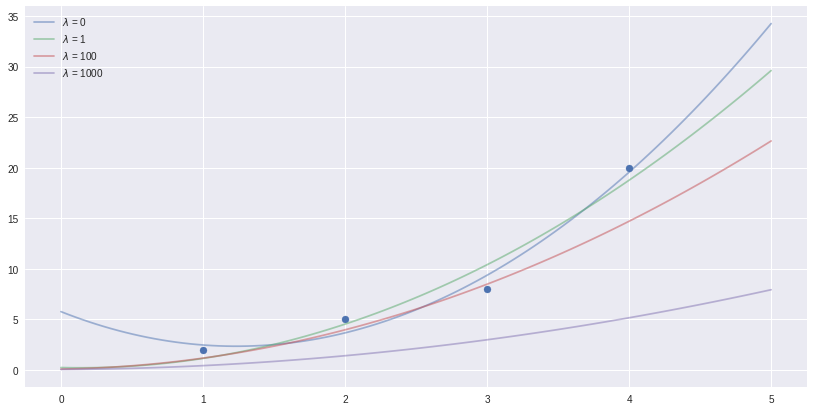

In [27]:
# compare different regularizer
reg = [0, 1, 100, 1000]
Ws = []

# get optimal parameter
for r in reg:
    Ws.append(maximum_likelihood_regression(X, PHI, Y, reg=r))

# plot points 
plt.scatter(X, Y)

# plot different regularizer
for w, reg in zip(Ws, reg):
    p = np.polynomial.polynomial.Polynomial(w)
    plt.plot(
        np.linspace(0, 5, 100),
        p(np.linspace(0, 5, 100)),
        alpha=.5,
        label="$\lambda$ = {}".format(reg),
    )
plt.legend(loc=0);